In [122]:
# Q1 Part A 

# Importing all the relevant libraries
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

In [123]:
# Acquiring the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

# Describing the data
print(train_df.columns.values)
train_df.head()
train_df.tail()
train_df.info()
print('_'*40)
test_df.info()
train_df.describe()

# Pivoting the input features
train_df.describe(include=['O'])
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 c

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplo

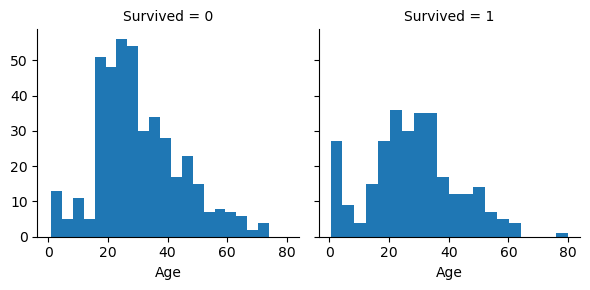

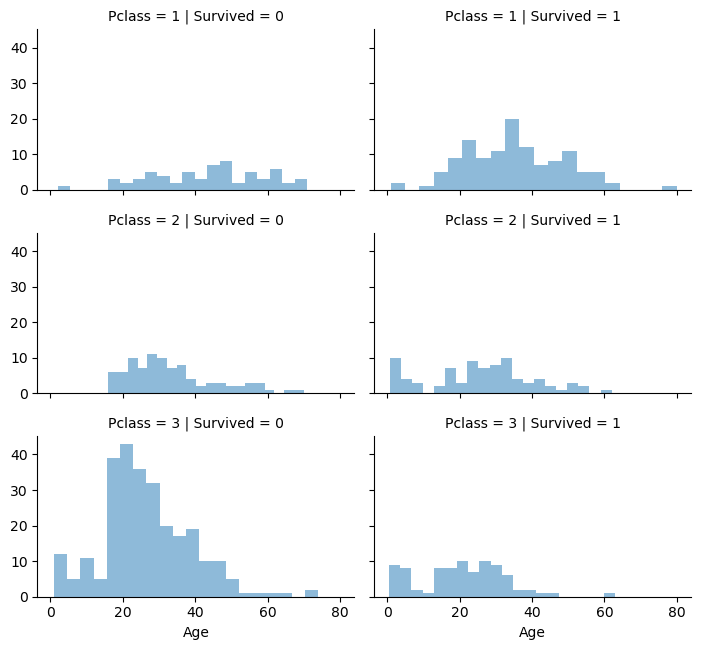

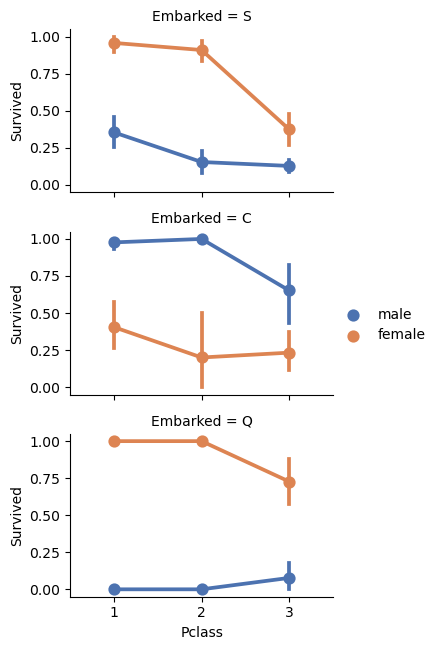

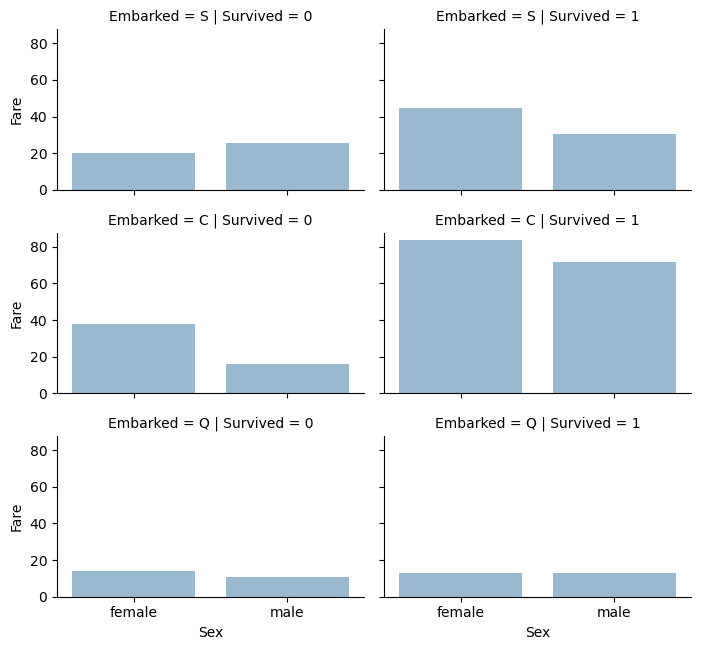

In [124]:
# Analyzing the Survived and Age features
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

# Analyzing the Survived and Pclass feature
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Analyzing the Embarked and Pclass feature
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Analyzing the Embarked and Sex features
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()


Before (891, 12) (418, 11) (891, 12) (418, 11)


C:\Users\sheik\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Priority
0,892,3,0,34,7.8292,2,1,1,0
1,893,3,1,47,7.0000,0,3,0,0
2,894,2,0,62,9.6875,2,1,1,0
3,895,3,0,27,8.6625,0,1,1,0
4,896,3,1,22,12.2875,0,3,0,0
5,897,3,0,14,9.2250,0,1,1,1
6,898,3,1,30,7.6292,2,2,1,0
7,899,2,0,26,29.0000,0,1,0,0
8,900,3,1,18,7.2292,1,3,1,0
9,901,3,0,21,24.1500,0,1,0,0


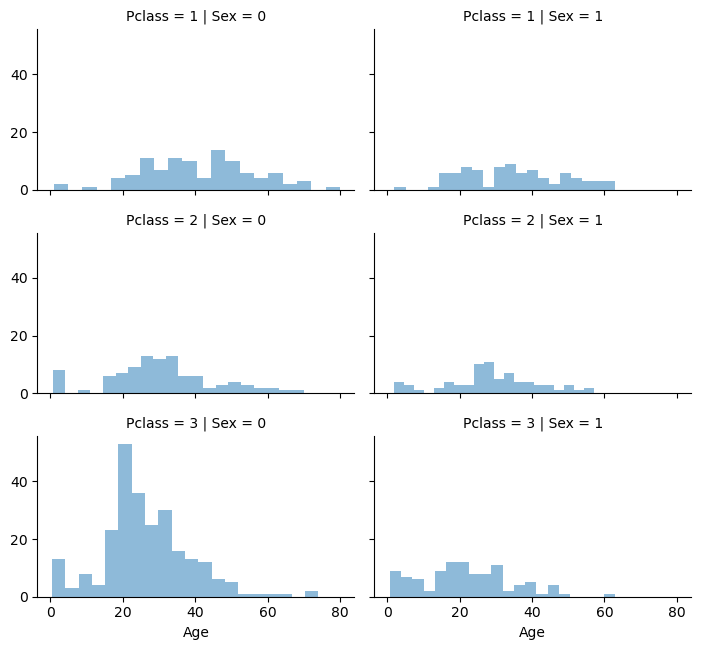

In [125]:
# Performing Feature Engineering
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

# Dropping irrelevant features
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]
"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

# Creating a new feature: Title
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train_df['Title'], train_df['Sex'])

for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

# Converting the Sex feature from string to numerical 
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df.head()

# Visualizing the preprocessing
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

# Guessing the missing values in the Age column
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Converting the random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)
train_df.head()

# Comparing Family size feature with Survived
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train_df[['FamilySize', 
          'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Creating an 'IsAlone' feature
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

# Dropping some irrelevant features in favour of the 'IsAlone' feature
train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

# Creating a new feature: Priority
for dataset in combine:
  
    dataset['Priority'] = ((dataset['Age'] < 16) | (dataset['Pclass'] == 1)).astype(int)
    
train_df.head()

# Imputing the missing values in the Embarked feature
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 
          'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Assigning numerical values to the Embarked feature
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train_df.head()

# Imputing the missing values in Fare column using the median function 
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()
test_df.head(10)


In [126]:
# Initializing the StandardScaler
scaler = StandardScaler()

X_pretrain = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_pretest  = test_df.drop("PassengerId", axis=1).copy()

# Fitting the scaler on the training data and transform both the training and test data
X_train = scaler.fit_transform(X_pretrain)
X_test = scaler.transform(X_pretest)
X_train.shape, Y_train.shape, X_test.shape


((891, 8), (891,), (418, 8))

Average Classification Accuracy: 98.2 %


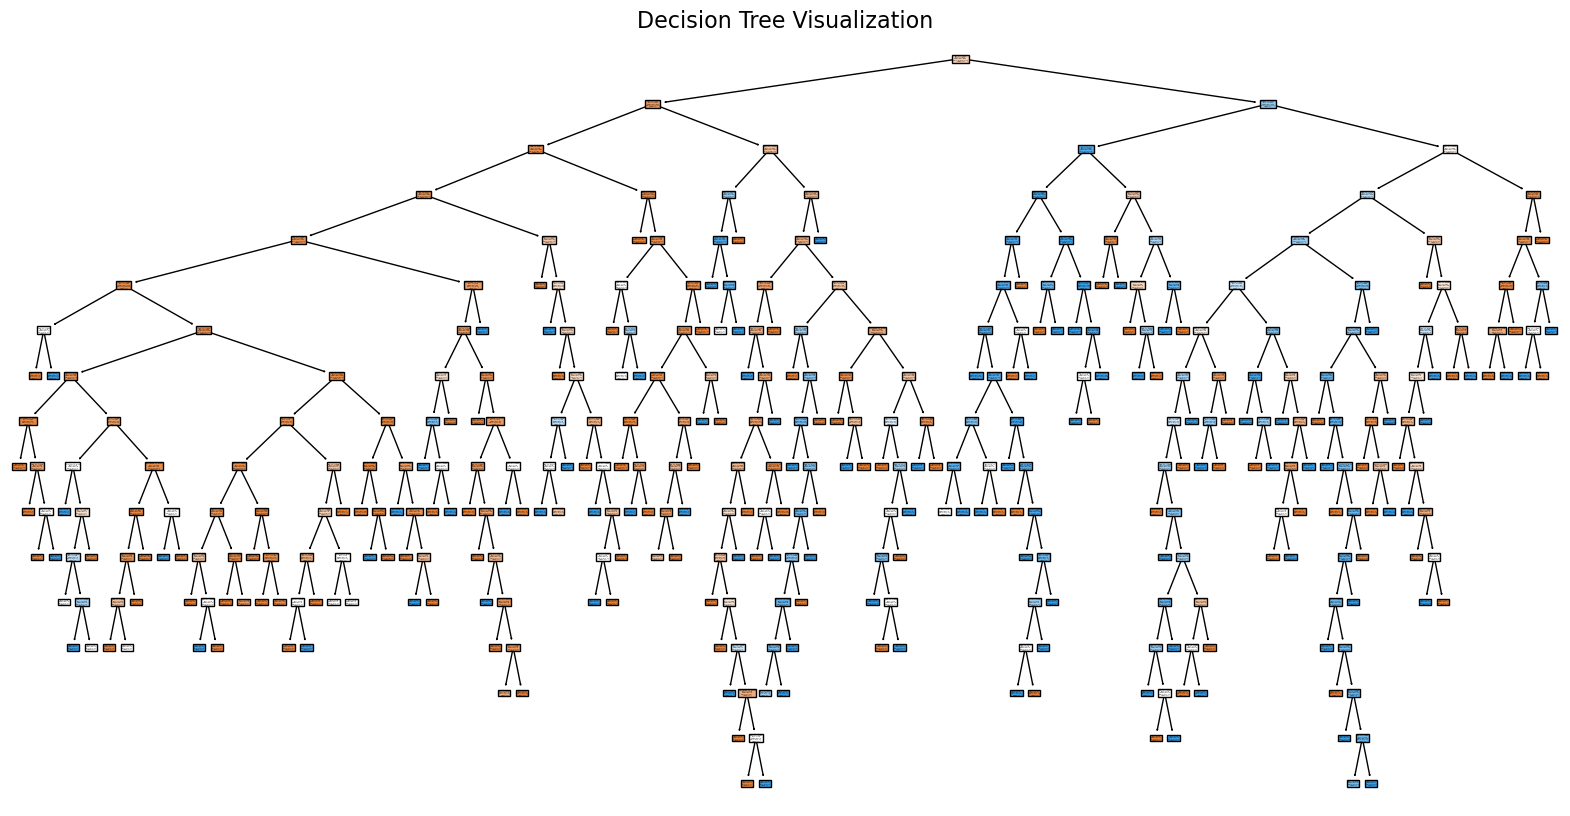

In [127]:
# Q1 Part B

# Implementing the Decision Tree algorithm
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
print("Average Classification Accuracy:", acc_decision_tree, "%")

# Getting the list of feature names
feature_names = list(X_pretrain.columns)

# Plotting the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, class_names=['0', '1'], feature_names=feature_names)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


In [128]:
# Q1 Part C (Applying 5 fold cross validation for DT model)

# Defining the parameter grid
param_grid = {
    'max_depth': list(range(2, 101, 2)),
    'min_samples_split': list(range(2, 101, 2))
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(decision_tree, param_grid, cv=5, scoring='accuracy')

# Fitting the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Printing the best average accuracy score
best_accuracy = grid_search.best_score_
print(f"Average Classification Accuracy: {best_accuracy * 100:.2f} %")

Average Classification Accuracy: 82.49 %


In [129]:
# Q1 Part D

# Implementing the Random Forest algorithm
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print("Average Classification Accuracy:", acc_random_forest,"%")


Average Classification Accuracy: 98.2 %


In [130]:
# Applying 5 fold cross validation for RF model

# Defining the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': list(range(2, 31, 2))
}

# Creating the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Creating the GridSearchCV object
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')

# Fitting the model on the training data
grid_search_rf.fit(X_train, Y_train)
best_random_forest = grid_search_rf.best_estimator_
cv_scores_rf = cross_val_score(best_random_forest, X_train, Y_train, cv=5, scoring='accuracy')

# Printing the best average accuracy score
average_accuracy_rf = np.mean(cv_scores_rf)
print(f"Average Classification Accuracy: {average_accuracy_rf:.2%}")


Average Classification Accuracy: 83.95%
